Week 4 · Day 4 — t-SNE (t-distributed Stochastic Neighbor Embedding)
Why this matters

t-SNE is a nonlinear dimensionality reduction technique. Unlike PCA, which finds global variance directions, t-SNE focuses on local neighborhoods — great for visualizing clusters in high-dimensional data (e.g., images, text embeddings).

Theory Essentials

Goal: Preserve local structure — similar points in high-dim stay close in 2D/3D.

Works by minimizing divergence between probability distributions of pairwise similarities.

Perplexity: controls balance between local vs global structure.

Sensitive to hyperparameters (perplexity, learning rate).

Expensive: only good for visualization, not as a preprocessing step for models.

How it works (intuition)

In high-dim space (here 64-dim pixels of each digit), it computes pairwise similarities between points.

It builds probabilities: “point A and B are neighbors with probability p.”

In low-dim (2D), it tries to place points so their neighbor probabilities q match the high-dim ones.

It minimizes the difference between p and q using a special loss (KL divergence).

Result: clusters in 2D where digits that look similar group together.

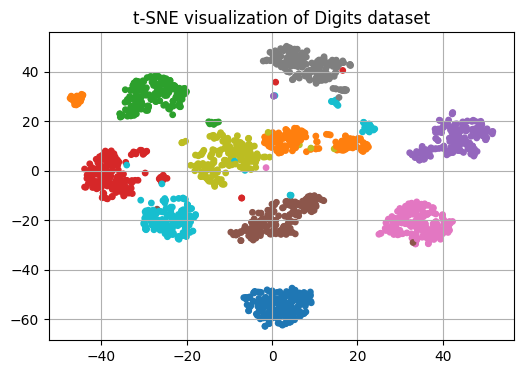

In [1]:
# Setup
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

np.random.seed(42)
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams["axes.grid"] = True

# Load dataset
digits = load_digits()
X = digits.data
y = digits.target

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42, init="pca", learning_rate="auto")
X_tsne = tsne.fit_transform(X)

# Plot
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap="tab10", s=15)
plt.title("t-SNE visualization of Digits dataset")
plt.show()


Exercises

1) Core (10–15 min)
Task: Change perplexity to 5 and 50. Compare plots.

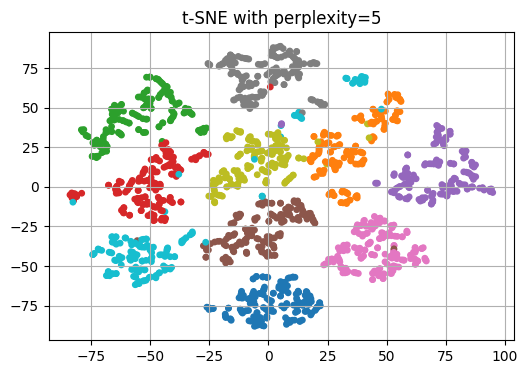

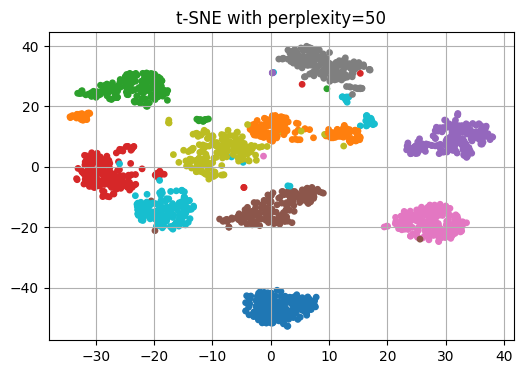

In [2]:
for p in [5,50]:
    tsne = TSNE(n_components=2, perplexity=p, random_state=42, init="pca", learning_rate="auto")
    X_tsne = tsne.fit_transform(X)
    plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap="tab10", s=15)
    plt.title(f"t-SNE with perplexity={p}")
    plt.show()


2) Practice (10–15 min)
Task: Run t-SNE with different random seeds (random_state). Compare results.

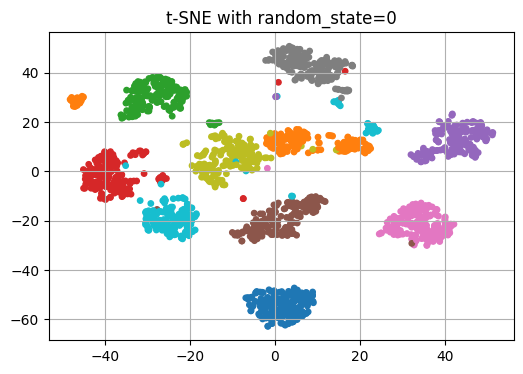

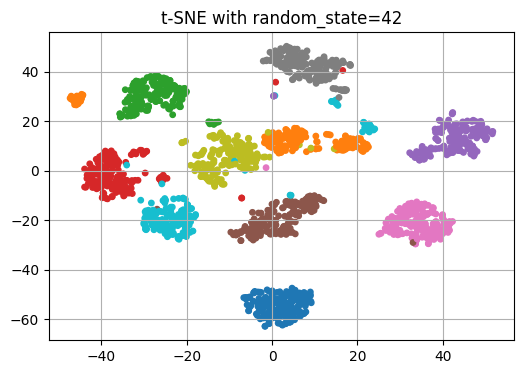

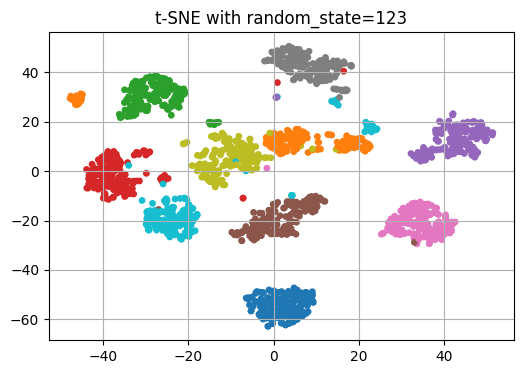

In [3]:
for seed in [0,42,123]:
    tsne = TSNE(n_components=2, perplexity=30, random_state=seed, init="pca", learning_rate="auto")
    X_tsne = tsne.fit_transform(X)
    plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap="tab10", s=15)
    plt.title(f"t-SNE with random_state={seed}")
    plt.show()


3) Stretch (optional, 10–15 min)
Task: Apply t-SNE to the Iris dataset. Compare with PCA from Day 3.

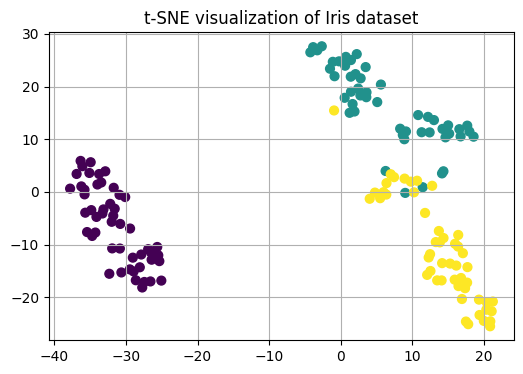

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

tsne = TSNE(n_components=2, perplexity=10, random_state=42, init="pca", learning_rate="auto")
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap="viridis", s=40)
plt.title("t-SNE visualization of Iris dataset")
plt.show()


Mini-Challenge (≤40 min)

Task: Compare PCA (Day 3) and t-SNE on the digits dataset.
Acceptance Criteria:

Two side-by-side plots (PCA vs t-SNE).

Mention whether clusters are more separable with t-SNE.

One paragraph reflection: When would you prefer PCA vs t-SNE?

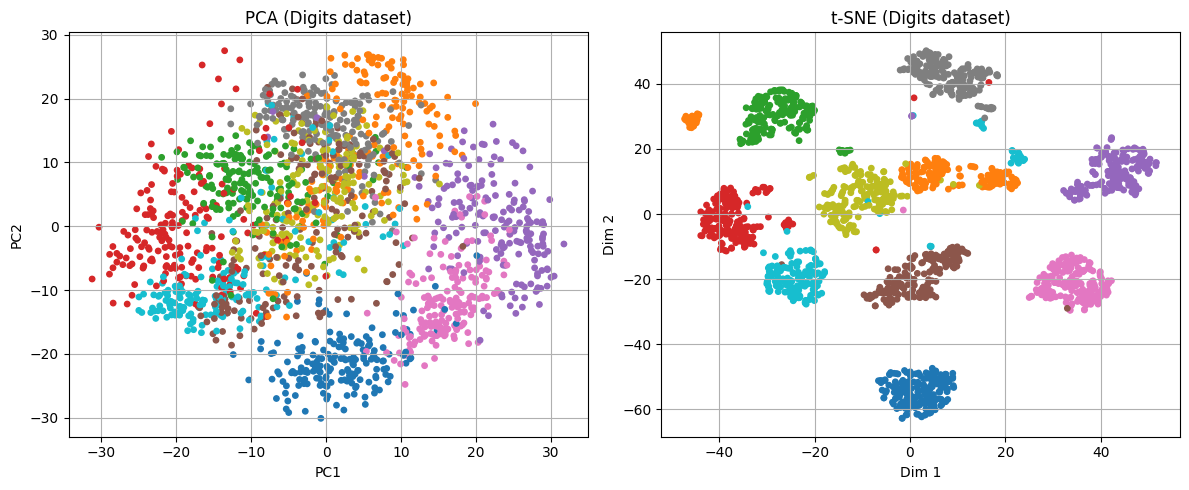

In [6]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# PCA (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# t-SNE (2D)
tsne = TSNE(n_components=2, perplexity=30, random_state=42, init="pca", learning_rate="auto")
X_tsne = tsne.fit_transform(X)

# Side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# PCA plot
axes[0].scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="tab10", s=15)
axes[0].set_title("PCA (Digits dataset)")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")

# t-SNE plot
axes[1].scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap="tab10", s=15)
axes[1].set_title("t-SNE (Digits dataset)")
axes[1].set_xlabel("Dim 1")
axes[1].set_ylabel("Dim 2")

plt.tight_layout()
plt.show()



Clusters are much more separable with t-SNE. The digits dataset is not very linear, so PCA struggles to capture enough structure with only two components. PCA is fast, interpretable, and works well if the data has linear variance structure. t-SNE, while slower, excels at revealing nonlinear cluster patterns and produces clearer visualizations when classes overlap in PCA space.

Reflection

Why is t-SNE mainly used for visualization, not for feature reduction in models?

How does t-SNE complement PCA in understanding high-dimensional data?

Why is t-SNE mainly used for visualization, not for feature reduction in models?

t-SNE is non-linear and stochastic: results can vary with seeds and parameters, making it unstable for downstream models.

It preserves local neighborhoods but distorts global distances, so the new axes (t-SNE1, t-SNE2) don’t have a clear numeric meaning.

It’s also computationally heavy — not practical as a preprocessing step for large datasets.

How does t-SNE complement PCA in understanding high-dimensional data?

PCA captures global variance: broad structure, dominant axes of spread.

t-SNE captures local neighborhoods: fine-grained clusters of similar points.

Together: PCA gives the “big picture” (overall shape), while t-SNE zooms in on “who is close to whom,” making hidden groups visible.